In [ ]:
#pip install rasterio

## Imports

In [41]:
import os
import rasterio
from glob import glob
import matplotlib.pyplot as plt
from rasterio.plot import show
from tqdm import tqdm
import numpy as np
from collections import defaultdict
import seaborn as sns
import pandas as pd
import math

<hr>

## Exploring Dataset Structure

In [3]:
base_path = "/kaggle/input/sentinel2-crop-mapping"
years = ['data2016', 'data2017', 'data2018', 'data2019']
regions = ['lombardia', 'lombardia2', 'lombardia3']

In [4]:
# Checking what's inside each directory in each year
for region in regions:
    print(f"\n=== Exploring {region} ===")
    total_files = 0

    for year in years:
        year_path = os.path.join(base_path, region, year)
        if os.path.exists(year_path):
            files = os.listdir(year_path)
            total_files += len(files)
            print(f"{year}: {len(files)} files")
            print("Sample files: ", files[:3])

    print(f"Total files in {region}: {total_files}")


=== Exploring lombardia ===
data2016: 3328 files
Sample files:  ['437', '1520', '1446']
data2017: 3328 files
Sample files:  ['437', '1520', '1446']
data2018: 3329 files
Sample files:  ['437', '1520', '1446']
data2019: 3328 files
Sample files:  ['437', '1520', '1446']
Total files in lombardia: 13313

=== Exploring lombardia2 ===
data2016: 3328 files
Sample files:  ['437', '1520', '1446']
data2017: 3328 files
Sample files:  ['437', '1520', '1446']
data2018: 3328 files
Sample files:  ['437', '1520', '1446']
data2019: 3328 files
Sample files:  ['437', '1520', '1446']
Total files in lombardia2: 13312

=== Exploring lombardia3 ===
data2016: 3328 files
Sample files:  ['437', '1520', '1446']
data2017: 3328 files
Sample files:  ['437', '1520', '1446']
data2018: 3328 files
Sample files:  ['437', '1520', '1446']
data2019: 3328 files
Sample files:  ['437', '1520', '1446']
Total files in lombardia3: 13312


In [5]:
# Inspecting class definitions
with open(os.path.join(base_path, "lombardia-classes/classes25pc.txt")) as f:
    classes = f.readlines()
    for line in classes:
        print(line.strip())

0|Unknown|20180101|20181230
2|Other cereals|20171109|20180630
4|Woods and other tree crops|20180225|20181030
7|Forage|20180130|20180715
9|Corn|20180424|20180915
12|Rice|20180508|20180930
1,3,5,6,8,10,11,13,14,15,16,20|Unknow cropland|20180201|20181230
17,18,19,21|No arable land|20180201|20181230


<hr>

## Exploring the Dataset


=== Exploring lombardia/data2016/437 ===
Total tif_files found: 69
Total y_path found: 1
Total input_paths found: 34
Total msavi_paths found: 34
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


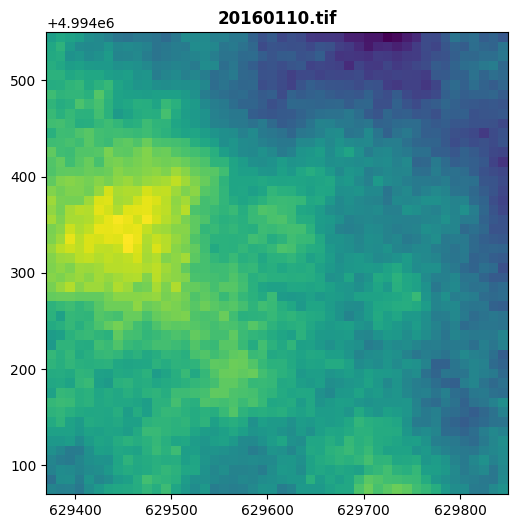

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


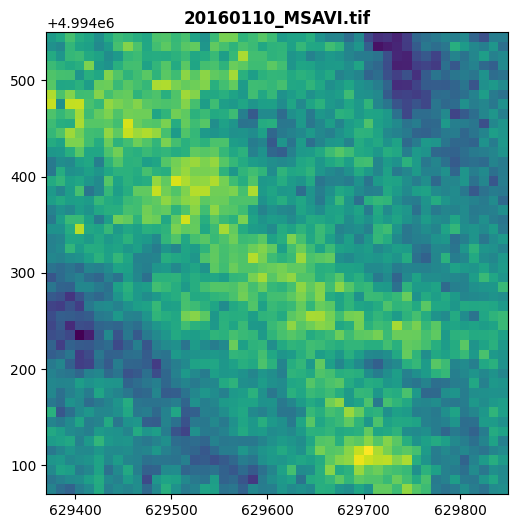

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {2, 7, 9, 11, 14, 17, 20}


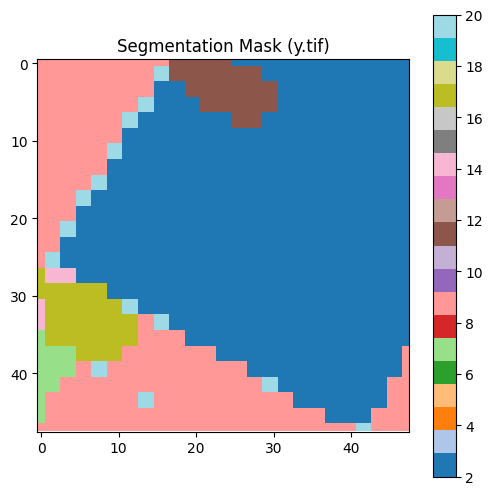


=== Exploring lombardia/data2017/437 ===
Total tif_files found: 107
Total y_path found: 1
Total input_paths found: 53
Total msavi_paths found: 53
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


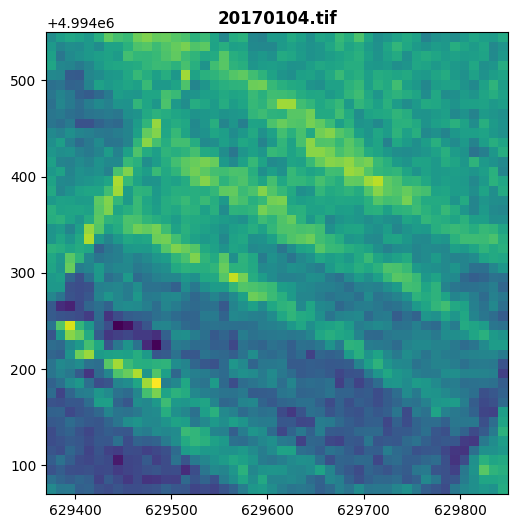

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


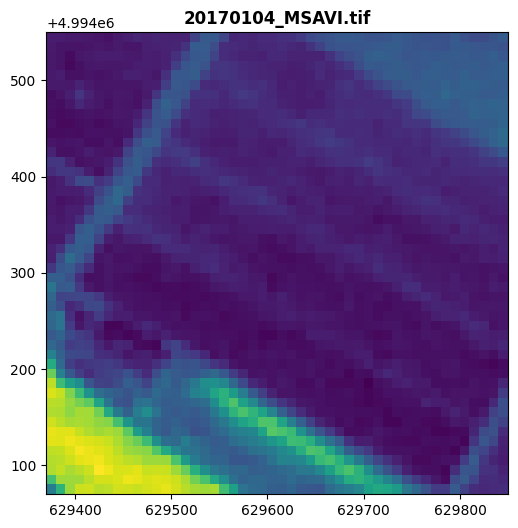

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {2, 9, 11, 14, 17, 20}


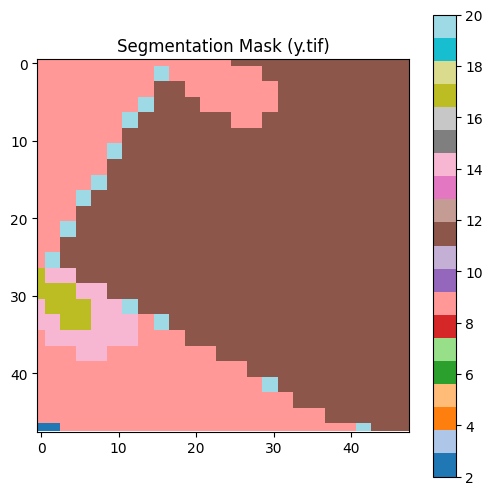


=== Exploring lombardia/data2018/437 ===
Total tif_files found: 137
Total y_path found: 1
Total input_paths found: 68
Total msavi_paths found: 68
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


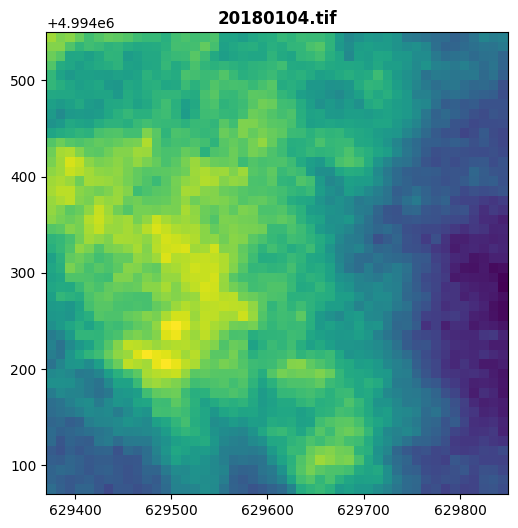

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


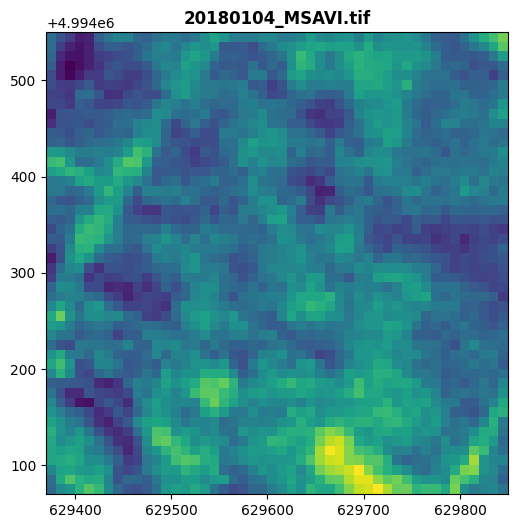

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {2, 7, 9, 11, 14, 17, 20}


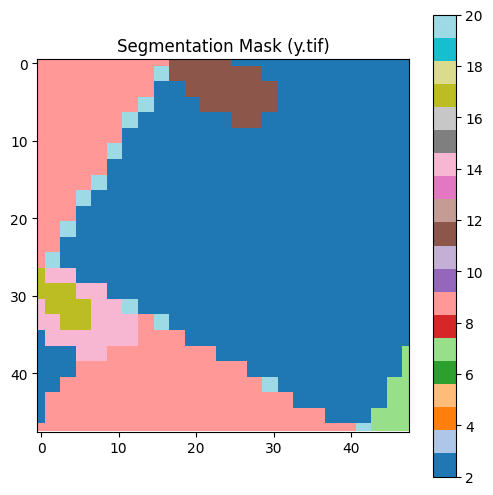


=== Exploring lombardia/data2019/437 ===
Total tif_files found: 143
Total y_path found: 1
Total input_paths found: 71
Total msavi_paths found: 71
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


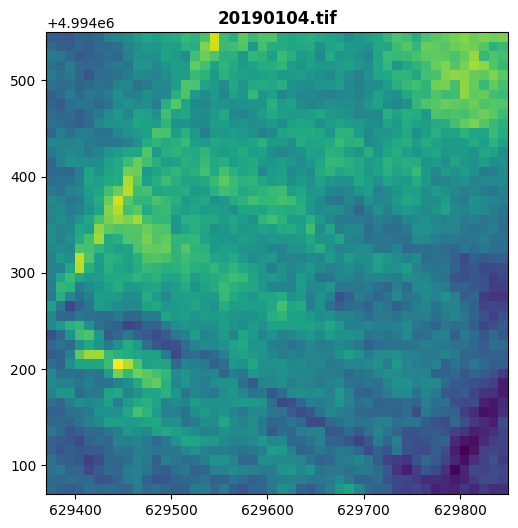

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}


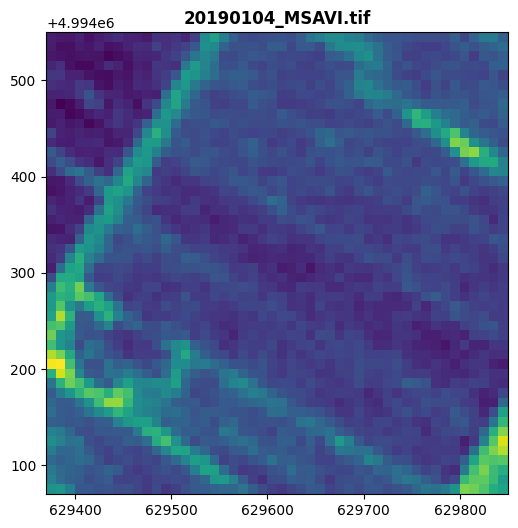

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 629370.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {2.0, 7.0, 9.0, 11.0, 14.0, 17.0, 20.0}


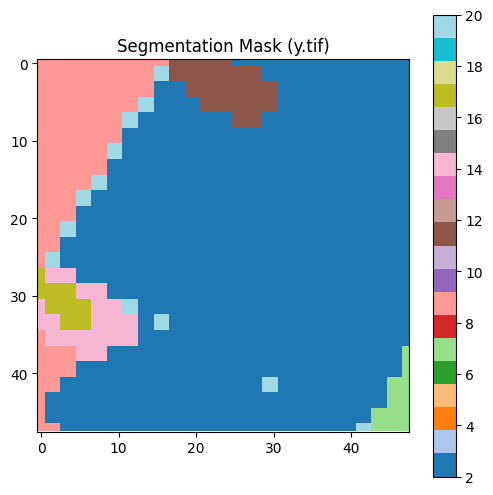


=== Exploring lombardia2/data2016/437 ===
Total tif_files found: 67
Total y_path found: 1
Total input_paths found: 33
Total msavi_paths found: 33
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


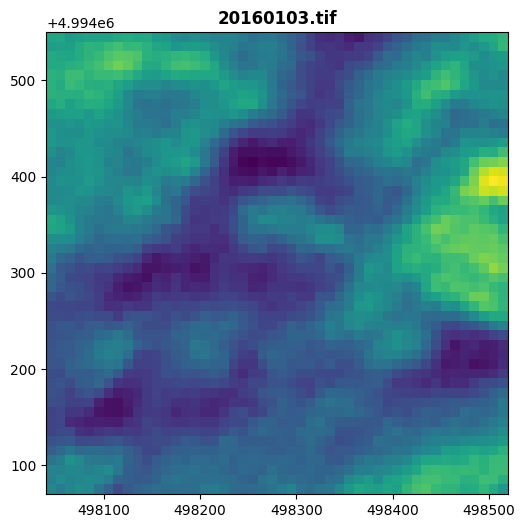

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


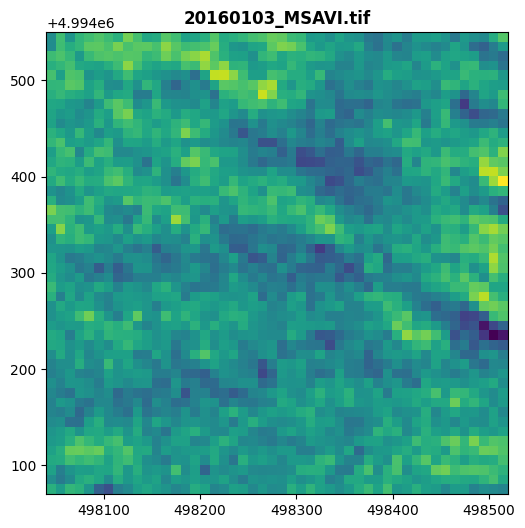

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {17, 12, 20}


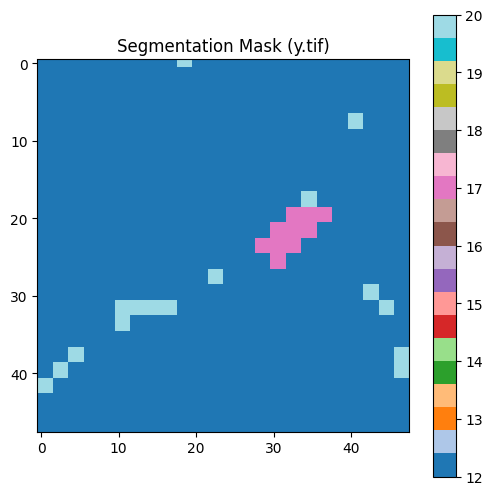


=== Exploring lombardia2/data2017/437 ===
Total tif_files found: 107
Total y_path found: 1
Total input_paths found: 53
Total msavi_paths found: 53
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


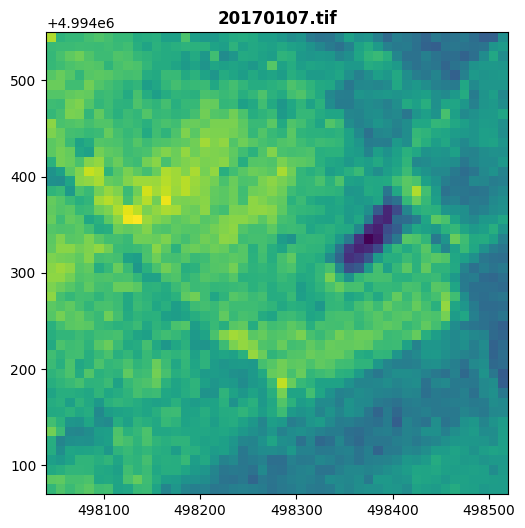

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


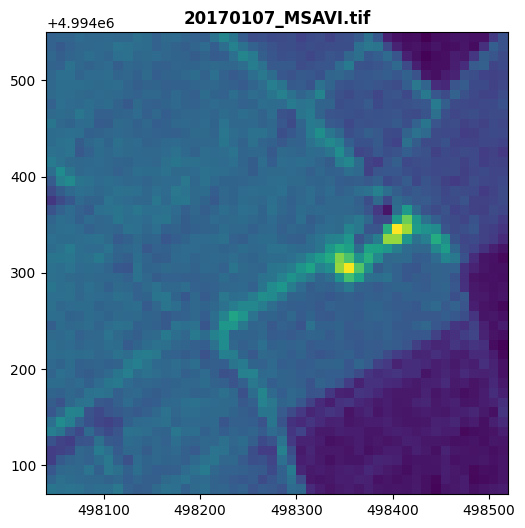

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {17, 12, 20}


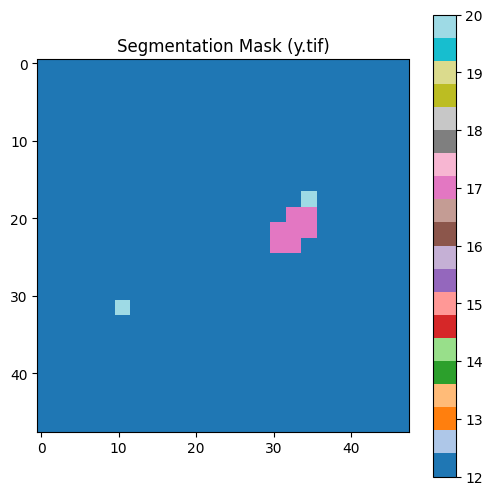


=== Exploring lombardia2/data2018/437 ===
Total tif_files found: 143
Total y_path found: 1
Total input_paths found: 71
Total msavi_paths found: 71
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


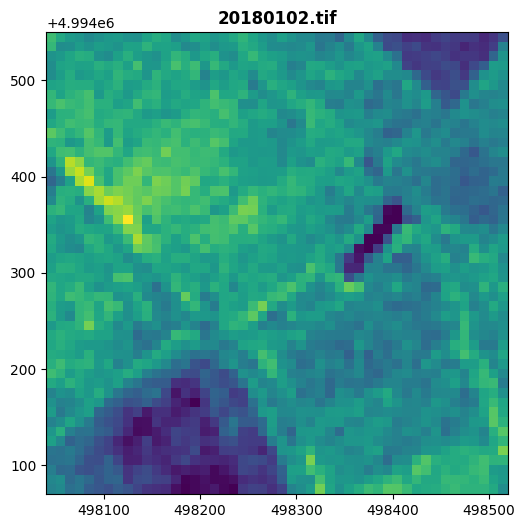

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


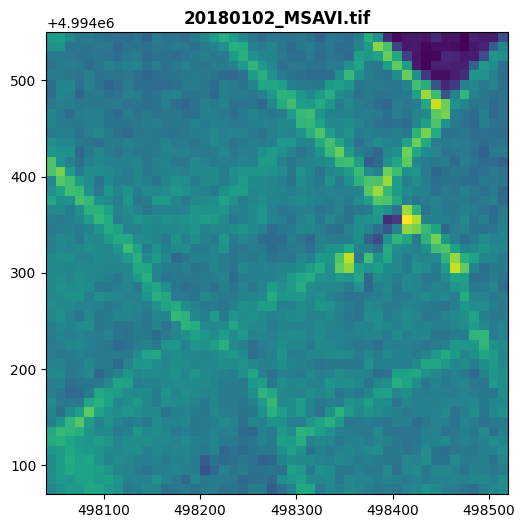

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {17, 12, 20}


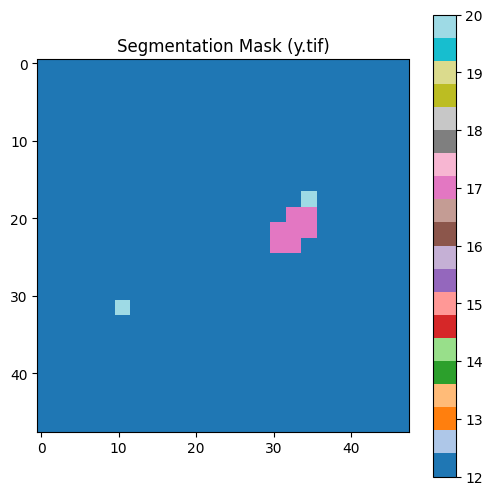


=== Exploring lombardia2/data2019/437 ===
Total tif_files found: 145
Total y_path found: 1
Total input_paths found: 72
Total msavi_paths found: 72
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


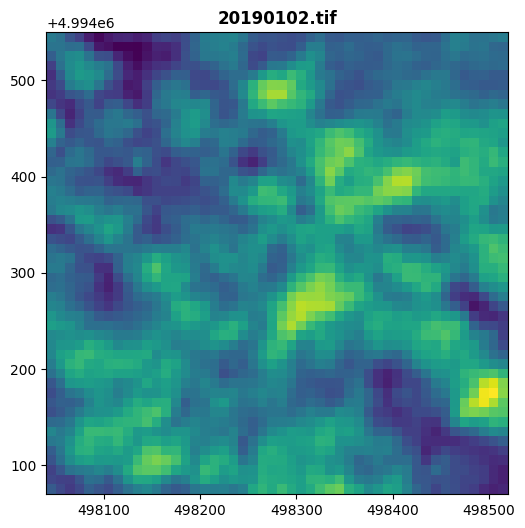

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}


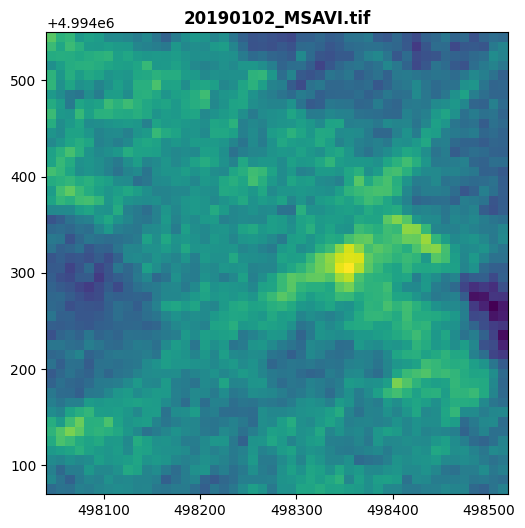

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 498040.0,
       0.0, -10.0, 4994550.0)}
Unique labels: {17, 12, 20}


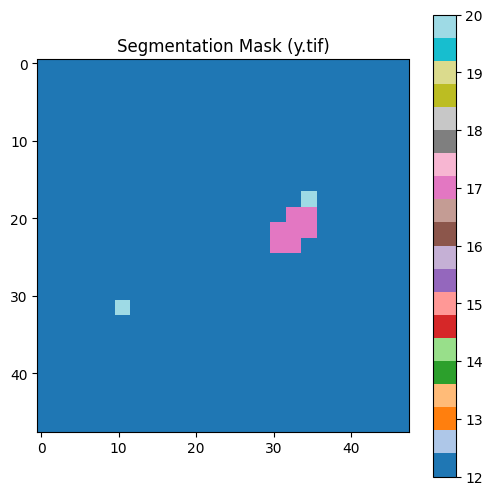


=== Exploring lombardia3/data2016/437 ===
Total tif_files found: 65
Total y_path found: 1
Total input_paths found: 32
Total msavi_paths found: 32
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


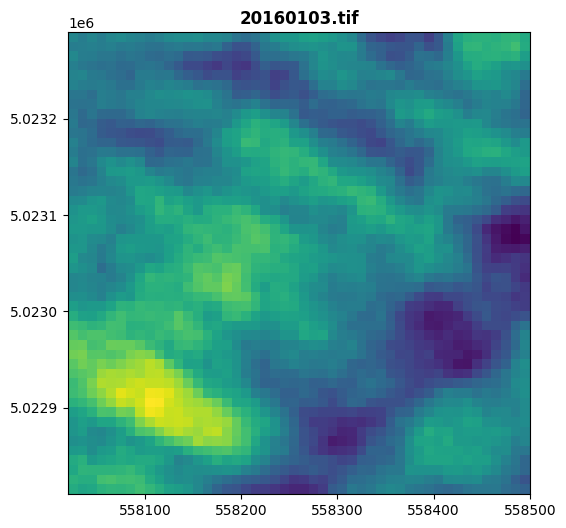

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


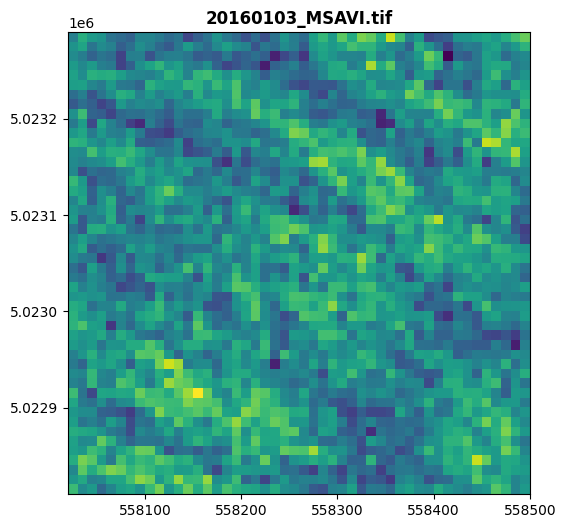

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}
Unique labels: {2, 4, 7, 9, 14, 17, 19, 20, 21}


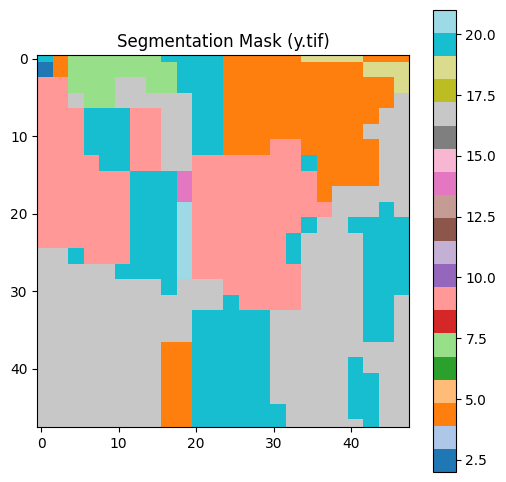


=== Exploring lombardia3/data2017/437 ===
Total tif_files found: 107
Total y_path found: 1
Total input_paths found: 53
Total msavi_paths found: 53
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


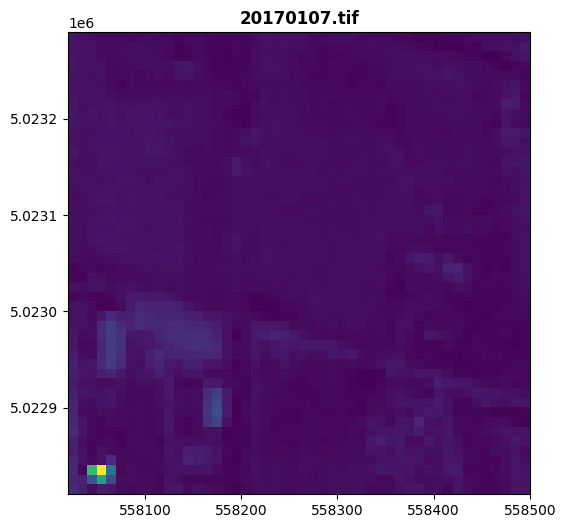

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


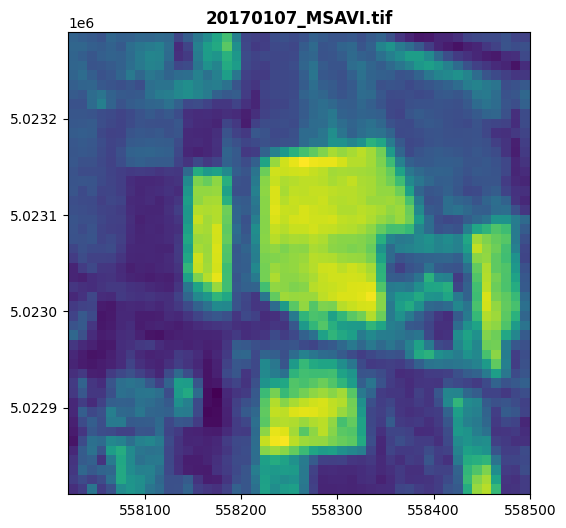

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}
Unique labels: {1, 2, 4, 7, 9, 17, 19, 20, 21}


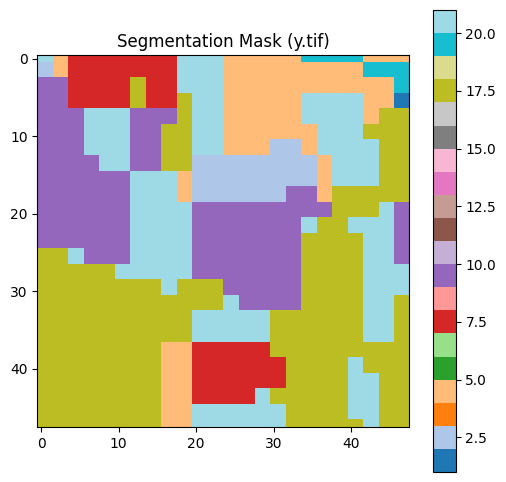


=== Exploring lombardia3/data2018/437 ===
Total tif_files found: 143
Total y_path found: 1
Total input_paths found: 71
Total msavi_paths found: 71
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


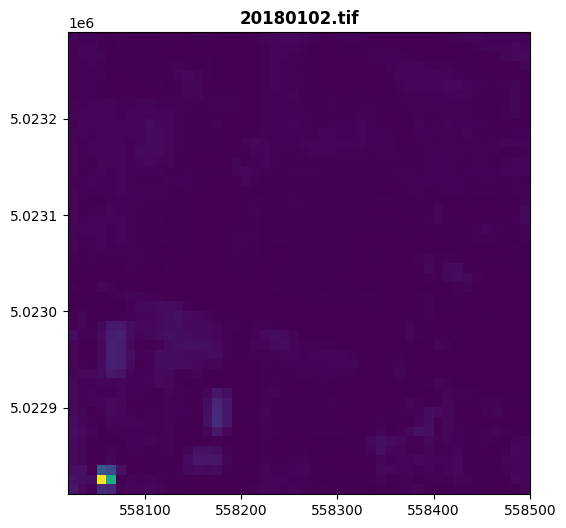

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


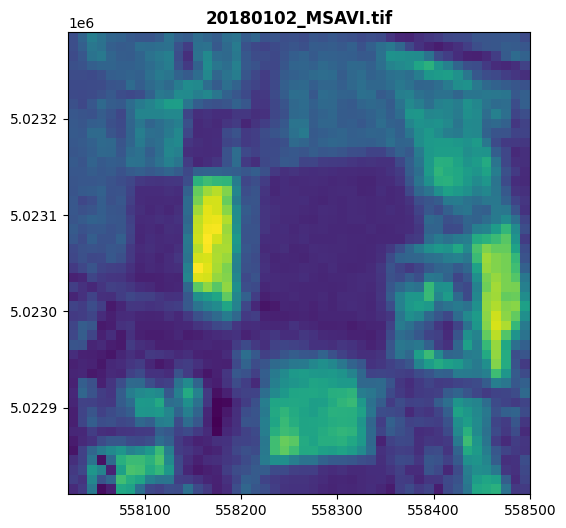

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}
Unique labels: {1, 2, 4, 7, 9, 14, 17, 19, 20, 21}


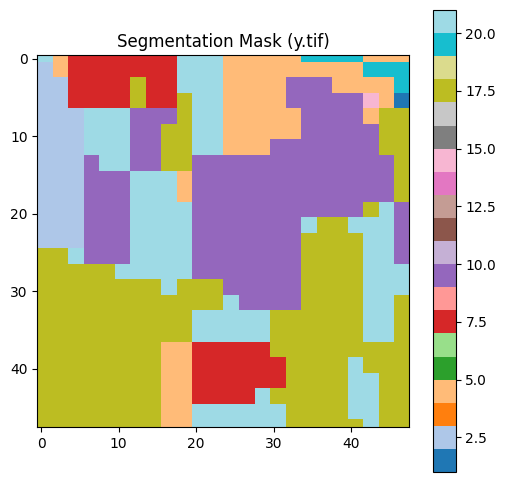


=== Exploring lombardia3/data2019/437 ===
Total tif_files found: 145
Total y_path found: 1
Total input_paths found: 72
Total msavi_paths found: 72
Input Image Metadata: 
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 9, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


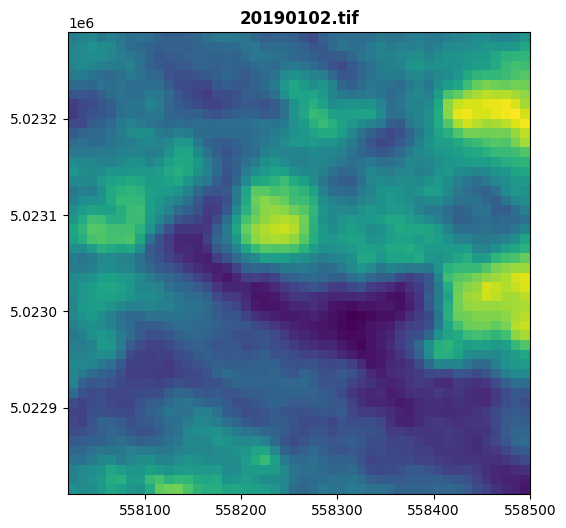

MSAVI Image Metadata
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}


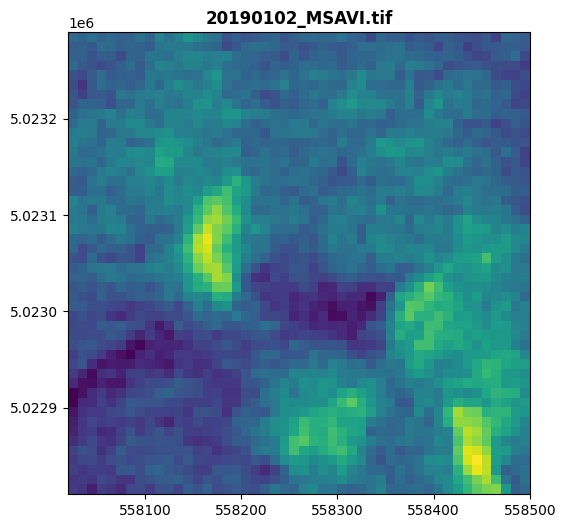

y.tif Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 48, 'height': 48, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 558020.0,
       0.0, -10.0, 5023290.0)}
Unique labels: {2, 4, 7, 9, 14, 17, 19, 20, 21}


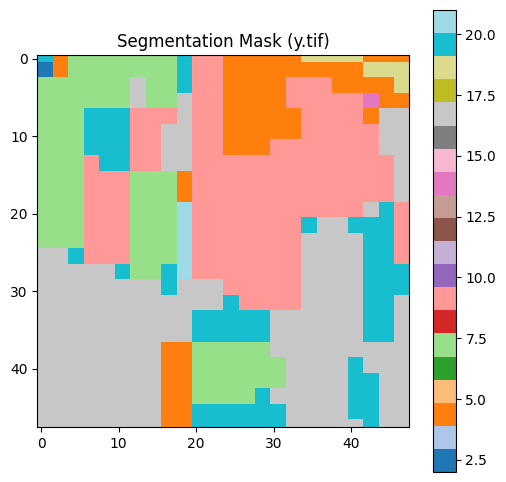

In [6]:
# Function to load a sample tile
def explore_sample_tile(region, year, tile_id):
    tile_path = os.path.join(base_path, region, year, tile_id)
    print(f"\n=== Exploring {region}/{year}/{tile_id} ===")

    # List all .tif files in this tile
    tif_files = sorted(glob(os.path.join(tile_path, "*.tif")))
    print(f'Total tif_files found: {len(tif_files)}')
    if not tif_files:
        print("No TIFF files found")
        return

    # Separate y.tif and input images
    y_path = [f for f in tif_files if os.path.basename(f) == 'y.tif']
    input_paths = [f for f in tif_files if "MSAVI" not in f and not f.endswith('y.tif')]
    msavi_paths = [f for f in tif_files if "MSAVI" in f]

    print(f'Total y_path found: {len(y_path)}')
    print(f'Total input_paths found: {len(input_paths)}')
    print(f'Total msavi_paths found: {len(msavi_paths)}')

    # Show 1st image and its MSAVI
    if input_paths:
        with rasterio.open(input_paths[0]) as src:
            print('Input Image Metadata: ')
            print(src.meta)
            plt.figure(figsize=(6,6))
            show(src, title=f'{os.path.basename(input_paths[0])}')
            plt.show()

    if msavi_paths:
        with rasterio.open(msavi_paths[0]) as src:
            print('MSAVI Image Metadata')
            print(src.meta)
            plt.figure(figsize=(6,6))
            show(src, title=f'{os.path.basename(msavi_paths[0])}')
            plt.show()

    # Show y.tif (segmentation map)
    if y_path:
        with rasterio.open(y_path[0]) as src:
            print("y.tif Metadata:")
            print(src.meta)
            mask = src.read(1)
            print("Unique labels:", set(mask.flatten()))
            plt.figure(figsize=(6, 6))
            plt.imshow(mask, cmap='tab20')
            plt.title("Segmentation Mask (y.tif)")
            plt.colorbar()
            plt.show()
    else:
        print("y.tif not found in this tile.")

# Iterate over regions and years
for region in regions:
    for year in years:
        sample_tile_ids = os.listdir(os.path.join(base_path, region, year))
        sample_tile_ids = [tid for tid in sample_tile_ids if os.path.isdir(os.path.join(base_path, region, year, tid))]
        if sample_tile_ids:
            explore_sample_tile(region, year, sample_tile_ids[0])  # just one tile per year
            

In [22]:
# Label Frequency across entire dataset
label_counts = defaultdict(int)
region_year_counts = defaultdict(lambda: defaultdict(int))

# Valid label ids (Some label are of 255 (65144 pixels) - means no data)
valid_labels = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

for region in regions:
    for year in years:
        year_path = os.path.join(base_path, region, year)
        tile_ids = os.listdir(year_path)

        for tile_id in tqdm(tile_ids, desc=f'{region}/{year}'):
            tile_path = os.path.join(year_path, tile_id)
            y_path = os.path.join(tile_path, 'y.tif')

            if not os.path.exists(y_path):
                continue  # Skip missing maps

            try:
                with rasterio.open(y_path) as src:
                    y = src.read(1)
            except: 
                continue  # Skip unreadable

            unique, counts = np.unique(y, return_counts=True)
            for label, count in zip(unique, counts):
                if int(label) in valid_labels:
                    label_counts[int(label)] += count
                    region_year_counts[(region, year)][int(label)] += count

lombardia3/data2019: 100%|██████████| 3328/3328 [00:22<00:00, 150.87it/s]


In [23]:
print("=== Overall Label Distribution ===")
print(label_counts)

print("\n=== Region, Year Label Distribution ===")
print(region_year_counts)

=== Overall Label Distribution ===
defaultdict(<class 'int'>, {2: 6246841, 7: 12952542, 9: 24061576, 11: 5193395, 14: 664500, 17: 10360576, 20: 6430800, 19: 914806, 6: 2088202, 4: 4967484, 21: 760016, 3: 80260, 16: 33976, 5: 547478, 8: 116358, 15: 1136130, 10: 1318, 1: 563694, 13: 543922, 12: 14114708, 18: 168818})

=== Region, Year Label Distribution ===
defaultdict(<function <lambda> at 0x7cb3c18ca160>, {('lombardia', 'data2016'): defaultdict(<class 'int'>, {2: 1255256, 7: 1103025, 9: 2418536, 11: 533854, 14: 23698, 17: 747377, 20: 629950, 19: 73548, 6: 460662, 4: 126380, 21: 61848, 3: 4296, 16: 7224, 5: 121956, 8: 12960, 15: 64622, 10: 64, 1: 17568, 13: 4704, 12: 132, 18: 52}), ('lombardia', 'data2017'): defaultdict(<class 'int'>, {2: 1135048, 9: 2487575, 11: 628045, 14: 30964, 17: 689841, 20: 516244, 4: 123398, 6: 460030, 7: 1184655, 21: 55008, 16: 8268, 5: 127688, 15: 65568, 13: 8280, 8: 14478, 10: 60, 19: 68756, 1: 28700, 3: 34722, 12: 332, 18: 52}), ('lombardia', 'data2018'): de

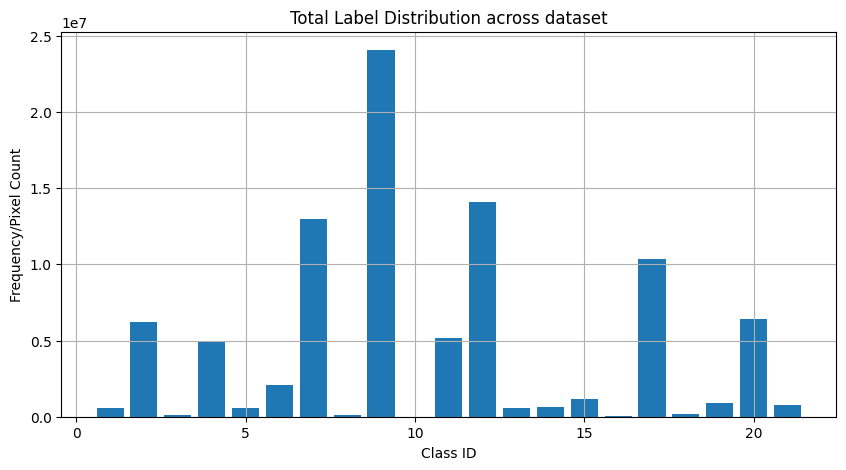

In [24]:
# Plotting overall label distribution
labels, counts = zip(*sorted(label_counts.items()))
plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xlabel("Class ID")
plt.ylabel("Frequency/Pixel Count")
plt.title("Total Label Distribution across dataset")
plt.grid(True)
plt.show()

         Region      Year  Label    Count
0     lombardia  data2016      2  1255256
1     lombardia  data2016      7  1103025
2     lombardia  data2016      9  2418536
3     lombardia  data2016     11   533854
4     lombardia  data2016     14    23698
..          ...       ...    ...      ...
230  lombardia3  data2019      8     6118
231  lombardia3  data2019      1    20806
232  lombardia3  data2019     13    15010
233  lombardia3  data2019     12     6456
234  lombardia3  data2019     16      360

[235 rows x 4 columns]


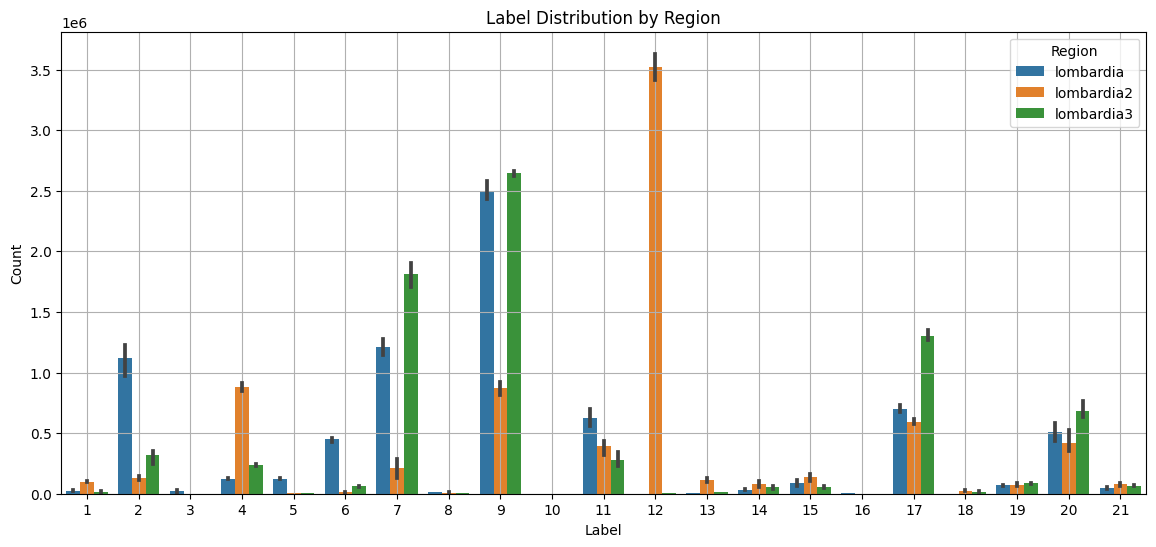

In [40]:
# Plotting per region-year distribution
data = []
for (region, year), counts_dict in region_year_counts.items():
    for label, count in counts_dict.items():
        data.append((region, year, label, count))

df = pd.DataFrame(data, columns=['Region', 'Year', 'Label', 'Count'])
print(df)

plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Label', y='Count', hue='Region')
plt.title("Label Distribution by Region")
plt.grid(True)
plt.show()

In [26]:
# Grouping the labels to create pie chart
label_categories = {
    "Unknown": [0],
    "Cereals": [2],
    "Woods and Tree Crops": [4],
    "Forage": [7],
    "Maize": [9],
    "Rice": [12],
    "Unknown Cropland": [1, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 20],
    "No Agricultural Land": [17, 18, 19, 21]
}

In [27]:
# Summing counts per category
category_distribution = {}
for category, class_ids in label_categories.items():
    total = sum(label_counts.get(cid, 0) for cid in class_ids)
    category_distribution[category] = total

print(category_distribution)

{'Unknown': 0, 'Cereals': 6246841, 'Woods and Tree Crops': 4967484, 'Forage': 12952542, 'Maize': 24061576, 'Rice': 14114708, 'Unknown Cropland': 17400033, 'No Agricultural Land': 12204216}


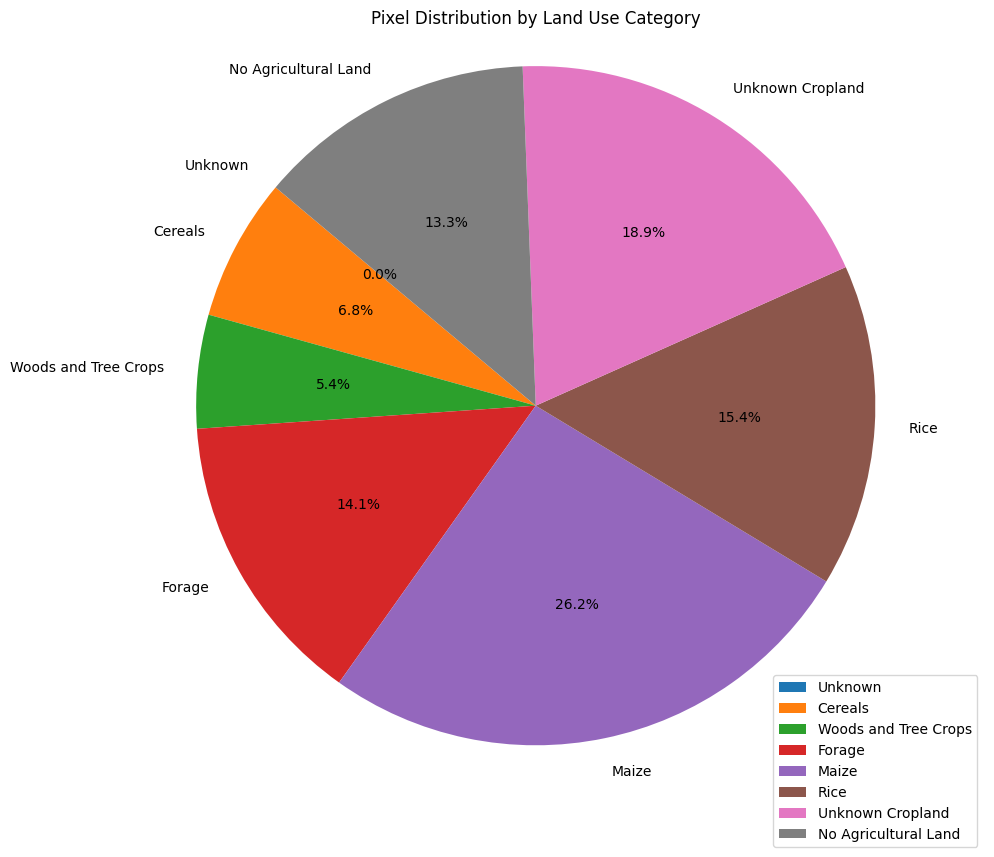

In [36]:
labels = list(category_distribution.keys())
sizes = list(category_distribution.values())

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pixel Distribution by Land Use Category')
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='lower right', bbox_to_anchor=(1.0, -0.1))
plt.show()

In [42]:
region_year_category_counts = {}

# --- Aggregate counts by category ---
for (region, year), class_counts in region_year_counts.items():
    category_counts = {}
    for category, class_ids in label_categories.items():
        total = sum(class_counts.get(cid, 0) for cid in class_ids)
        category_counts[category] = total
    region_year_category_counts[(region, year)] = category_counts

print(region_year_category_counts)

{('lombardia', 'data2016'): {'Unknown': 0, 'Cereals': 1255256, 'Woods and Tree Crops': 126380, 'Forage': 1103025, 'Maize': 2418536, 'Rice': 132, 'Unknown Cropland': 1881558, 'No Agricultural Land': 882825}, ('lombardia', 'data2017'): {'Unknown': 0, 'Cereals': 1135048, 'Woods and Tree Crops': 123398, 'Forage': 1184655, 'Maize': 2487575, 'Rice': 332, 'Unknown Cropland': 1923047, 'No Agricultural Land': 813657}, ('lombardia', 'data2018'): {'Unknown': 0, 'Cereals': 1191150, 'Woods and Tree Crops': 121192, 'Forage': 1256638, 'Maize': 2475465, 'Rice': 308, 'Unknown Cropland': 1843516, 'No Agricultural Land': 779443}, ('lombardia', 'data2019'): {'Unknown': 0, 'Cereals': 894143, 'Woods and Tree Crops': 123384, 'Forage': 1303336, 'Maize': 2609992, 'Rice': 0, 'Unknown Cropland': 1956478, 'No Agricultural Land': 780379}, ('lombardia2', 'data2016'): {'Unknown': 0, 'Cereals': 120902, 'Woods and Tree Crops': 930794, 'Forage': 102388, 'Maize': 794722, 'Rice': 3643276, 'Unknown Cropland': 1209792, 'No

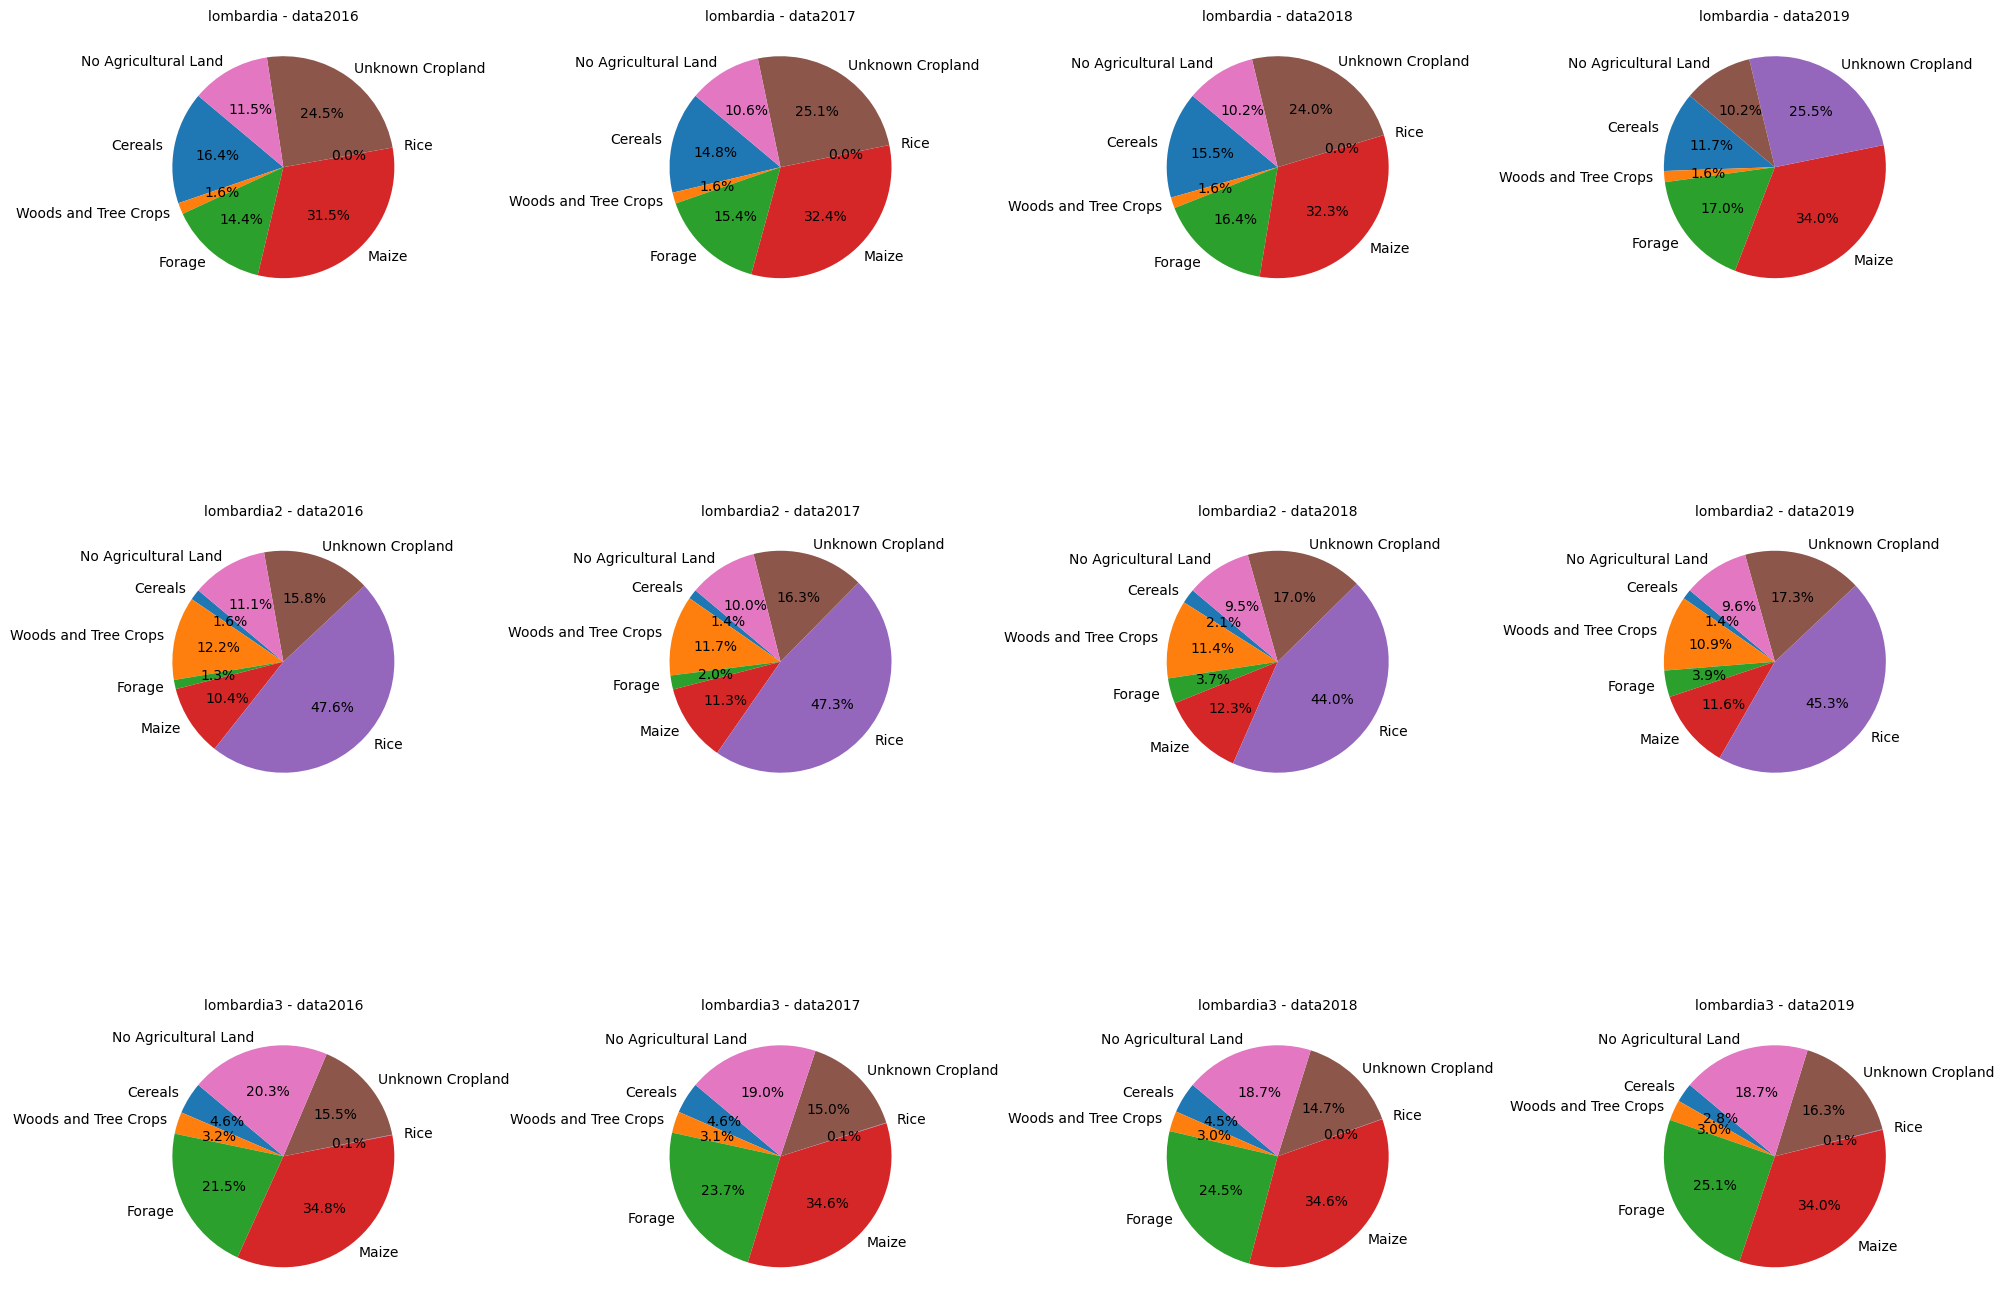

In [53]:
# --- Determine grid size ---
n = len(region_year_category_counts)
cols = 4  # Adjust based on your screen or output size
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axs = axs.flatten()

# --- Plot each pie chart ---
for idx, ((region, year), category_counts) in enumerate(region_year_category_counts.items()):
    ax = axs[idx]
    labels = list(category_counts.keys())
    sizes = list(category_counts.values())
    
    # Remove zero slices for clarity
    labels, sizes = zip(*[(l, s) for l, s in zip(labels, sizes) if s > 0])
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"{region} - {year}", fontsize=10)

# --- Hide any unused subplots ---
for i in range(len(region_year_category_counts), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

<hr>